# グラフ理論の基礎
### ねらい
* グラフ理論の基礎を学ぶ
* 頂点 (vertex, node) 、辺 (edge)
* 連結成分 (connected components, connected subgraph, cluster) 、シングルトン (singleton) 
* 深さ優先探索 (depth-first search) 、幅優先探索 (width-first search) 
*  経路 (path) 、閉路 (cycle) 
* 最小木 (minimum spanning tree)、最短経路 (shortest path) 
* 巡回セールスマン問題 (traveling salesman problem, TSP) 、中国人郵便配達問題 (Chinese postman problem) 、オイラーグラフ(Eulerian graph)

## グラフ、頂点 (vertex, node) 、辺 (edge) 
https://wwws.kobe-c.ac.jp/deguchi/c/tree/graph0.html
<img src="https://wwws.kobe-c.ac.jp/deguchi/c/tree/graph.gif">

### 例として、日本の都道府県の県庁所在地の緯度・経度のデータを使います。
まずはデータのダウンロードから

In [2]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/location.txt'

In [1]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib # Python 2 の場合
# import urllib.request # Python 3 の場合
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'location.txt') # Python 2 の場合
# urllib.request.urlretrieve(url, 'location.txt') # Python 3 の場合

In [175]:
# 先頭数行の確認
!head location.txt

Town,Longitude,Latitude
Sapporo,43.06417,141.34694
Aomori,40.82444,140.74
Morioka,39.70361,141.1525
Sendai,38.26889,140.87194
Akita,39.71861,140.1025
Yamagata,38.24056,140.36333
Fukushima,37.75,140.46778
Mito,36.34139,140.44667
Utsunomiya,36.56583,139.88361


In [40]:
# ダウンロードしたデータから、列ごとに数字を読み込んでリストに格納する。
col1 = [] # ０列目の数字を格納する予定のリスト
col2 = [] # １列目の数字を格納する予定のリスト
col3 = [] # ２列目の数字を格納する予定のリスト
for i, line in enumerate(open('location.txt')): # ファイルを開いて一行一行読み込む
    if i == 0: # ０番目の行の場合
        continue # 次の行に行く
    c = line.split(",") # 行をコンマで分割したものをcというリストに入れる
    col1.append(c[0]) # ０列目の単語col1に入れる
    col2.append(float(c[1])) # １列目の単語を実数に変換してcol2に入れる
    col3.append(float(c[2])) # ２列目の単語を実数に変換してcol3に入れる

In [5]:
# 都市名のリストの中身を確認する。
print (col1)

['Sapporo', 'Aomori', 'Morioka', 'Sendai', 'Akita', 'Yamagata', 'Fukushima', 'Mito', 'Utsunomiya', 'Maebashi', 'Saitama', 'Chiba', 'Tokyo', 'Yokohama', 'Niigata', 'Toyama', 'Kanazawa', 'Fukui', 'Kofu', 'Nagano', 'Gifu', 'Shizuoka', 'Nagoya', 'Tsu', 'Otsu', 'Kyoto', 'Osaka', 'Kobe', 'Nara', 'Wakayama', 'Tottori', 'Matsue', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima', 'Takamatsu', 'Matsuyama', 'Kochi', 'Fukuoka', 'Saga', 'Nagasaki', 'Kumamoto', 'Oita', 'Miyazaki', 'Kagoshima', 'Naha']


__課題1:__ 緯度のリスト、経度のリストの中身を確認してみましょう。

### データの図示

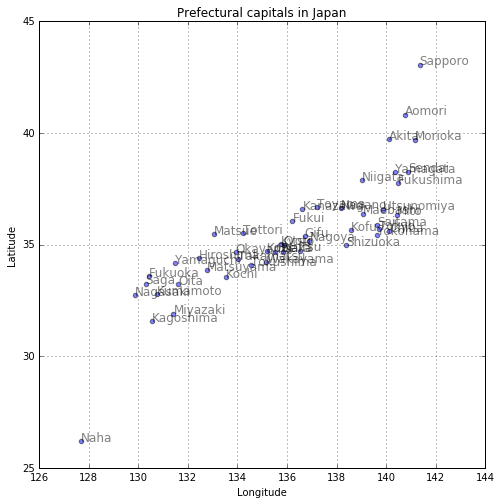

In [7]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline
#都市をプロットする
plt.figure(figsize=(8, 8))
plt.scatter(col3, col2, alpha=0.5)
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.5, size=12)
plt.show()

__課題2:__ 都市名を書かずに、点だけプロットした図を作成してみましょう。

### 都市間の距離を求める

In [8]:
# 都市間の距離を求める関数を作る。
import math
def distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

In [9]:
# すべての都市間で都市間の距離を計算する。
dist = []
for i, city1 in enumerate(zip(col1, col3, col2)):
    for j, city2 in enumerate(zip(col1, col3, col2)):
        if i >= j:
            continue
        dist.append(distance(city1[1], city1[2], city2[1], city2[2]))

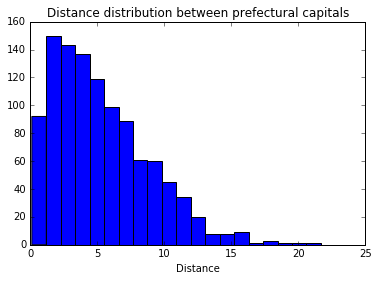

In [10]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline
# 都市間距離の分布を見る
plt.hist(dist, bins=20)
plt.title("Distance distribution between prefectural capitals")
plt.xlabel("Distance")
plt.show()

## 連結成分 (connected components, connected subgraphs)
非連結グラフを構成する各連結グラフを成分 (component) と呼びます。

### 都市間に辺 (edge) を引く

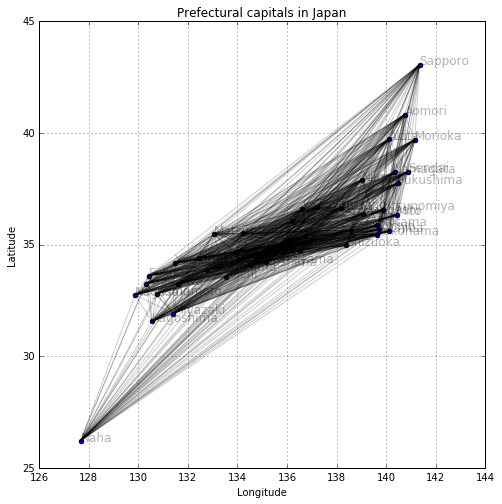

In [11]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline
#すべての都市間に辺を引く
plt.figure(figsize=(8, 8))
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
for city1, x1, y1 in zip(col1, col3, col2):
    for city2, x2, y2 in zip(col1, col3, col2):
        if city1 >= city2:
            continue
        plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.2)
plt.scatter(col3, col2)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.3, size=12)
plt.show()

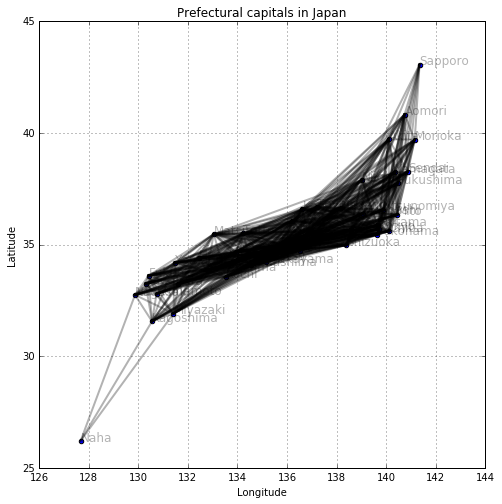

In [12]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline
#水平移動距離7以下の都市間だけ線を引く
plt.figure(figsize=(8, 8))
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
for city1, x1, y1 in zip(col1, col3, col2):
    for city2, x2, y2 in zip(col1, col3, col2):
        if city1 >= city2:
            continue
        if distance(x1, y1, x2, y2) > 7:
            continue
        plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, lw=2)
plt.scatter(col3, col2)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.3, size=12)
plt.show()

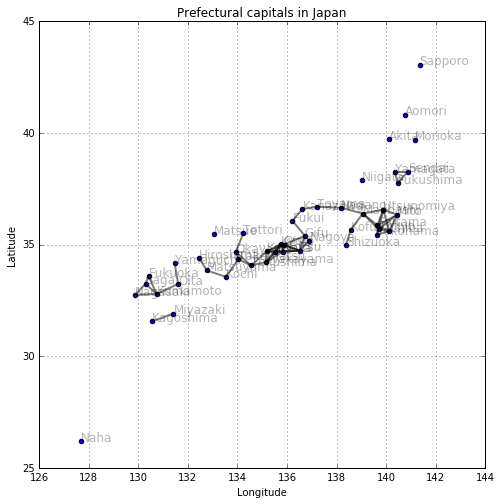

In [13]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline
#水平移動距離１以下の都市間だけ線を引く
plt.figure(figsize=(8, 8))
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
for city1, x1, y1 in zip(col1, col3, col2):
    for city2, x2, y2 in zip(col1, col3, col2):
        if city1 >= city2:
            continue
        if distance(x1, y1, x2, y2) > 1:
            continue
        plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.5, lw=2)
plt.scatter(col3, col2)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.3, size=12)
plt.show()

__課題3:__ 水平移動距離2以下の都市間だけ線を引いた場合に、どのようなネットワークが描けるか確認してみましょう。

上の図で、いくつかの「__連結成分__」が見えています。連結成分のことを__クラスター(clusters)__と呼ぶこともあります。要素が１つしか存在しないクラスターのことを__シングルトン（singleton）__と呼びます。連結成分の取り出し方について、以下で説明します。

### 辺 (edge) のリストを得る
連結している都市の組をすべて取り出します。ここで、「連結している都市の組」とは、「水平移動距離１以下の都市の組」を指すものとします。

In [14]:
edges = []
for i, city1 in enumerate(zip(col1, col3, col2)):
    for j, city2 in enumerate(zip(col1, col3, col2)):
        if i >= j:
            continue
        if distance(city1[1], city1[2], city2[1], city2[2]) > 1:
            continue
        edges.append((city1[0], city2[0]))

In [15]:
print (edges)

[('Sendai', 'Yamagata'), ('Sendai', 'Fukushima'), ('Yamagata', 'Fukushima'), ('Mito', 'Utsunomiya'), ('Mito', 'Saitama'), ('Mito', 'Chiba'), ('Mito', 'Tokyo'), ('Utsunomiya', 'Maebashi'), ('Utsunomiya', 'Saitama'), ('Utsunomiya', 'Chiba'), ('Utsunomiya', 'Tokyo'), ('Maebashi', 'Saitama'), ('Maebashi', 'Tokyo'), ('Maebashi', 'Kofu'), ('Maebashi', 'Nagano'), ('Saitama', 'Chiba'), ('Saitama', 'Tokyo'), ('Saitama', 'Yokohama'), ('Chiba', 'Tokyo'), ('Chiba', 'Yokohama'), ('Tokyo', 'Yokohama'), ('Toyama', 'Kanazawa'), ('Toyama', 'Nagano'), ('Kanazawa', 'Fukui'), ('Fukui', 'Gifu'), ('Kofu', 'Shizuoka'), ('Gifu', 'Nagoya'), ('Gifu', 'Tsu'), ('Gifu', 'Otsu'), ('Nagoya', 'Tsu'), ('Tsu', 'Otsu'), ('Tsu', 'Kyoto'), ('Tsu', 'Osaka'), ('Tsu', 'Nara'), ('Otsu', 'Kyoto'), ('Otsu', 'Osaka'), ('Otsu', 'Kobe'), ('Otsu', 'Nara'), ('Kyoto', 'Osaka'), ('Kyoto', 'Kobe'), ('Kyoto', 'Nara'), ('Kyoto', 'Wakayama'), ('Osaka', 'Kobe'), ('Osaka', 'Nara'), ('Osaka', 'Wakayama'), ('Kobe', 'Nara'), ('Kobe', 'Wakayama

### 連結リスト (linked list) を作成する
Pythonでは、自分と連結している都市のリストを格納した辞書を作成します。

In [20]:
neighbor1 = {}
for i, city1 in enumerate(zip(col1, col3, col2)):
    for j, city2 in enumerate(zip(col1, col3, col2)):
        if i >= j:
            continue
        if distance(city1[1], city1[2], city2[1], city2[2]) > 1:
            continue
        if city1[0] not in neighbor1.keys():
            neighbor1.update({city1[0]:[]})
        if city2[0] not in neighbor1[city1[0]]:
            neighbor1[city1[0]].append(city2[0])
        if city2[0] not in neighbor1.keys():
            neighbor1.update({city2[0]:[]})
        if city1[0] not in neighbor1[city2[0]]:
            neighbor1[city2[0]].append(city1[0])

In [21]:
print (neighbor1)

{'Utsunomiya': ['Mito', 'Maebashi', 'Saitama', 'Chiba', 'Tokyo'], 'Wakayama': ['Kyoto', 'Osaka', 'Kobe', 'Nara', 'Tokushima'], 'Nagasaki': ['Saga', 'Kumamoto'], 'Tokyo': ['Mito', 'Utsunomiya', 'Maebashi', 'Saitama', 'Chiba', 'Yokohama'], 'Okayama': ['Tottori', 'Tokushima', 'Takamatsu'], 'Miyazaki': ['Kagoshima'], 'Nagano': ['Maebashi', 'Toyama'], 'Toyama': ['Kanazawa', 'Nagano'], 'Maebashi': ['Utsunomiya', 'Saitama', 'Tokyo', 'Kofu', 'Nagano'], 'Nagoya': ['Gifu', 'Tsu'], 'Chiba': ['Mito', 'Utsunomiya', 'Saitama', 'Tokyo', 'Yokohama'], 'Sendai': ['Yamagata', 'Fukushima'], 'Tokushima': ['Kobe', 'Wakayama', 'Okayama', 'Takamatsu'], 'Kofu': ['Maebashi', 'Shizuoka'], 'Oita': ['Yamaguchi', 'Kumamoto'], 'Kobe': ['Otsu', 'Kyoto', 'Osaka', 'Nara', 'Wakayama', 'Tokushima'], 'Otsu': ['Gifu', 'Tsu', 'Kyoto', 'Osaka', 'Kobe', 'Nara'], 'Tsu': ['Gifu', 'Nagoya', 'Otsu', 'Kyoto', 'Osaka', 'Nara'], 'Nara': ['Tsu', 'Otsu', 'Kyoto', 'Osaka', 'Kobe', 'Wakayama'], 'Hiroshima': ['Matsuyama'], 'Matsuyama': [

## 深さ優先探索
深さ優先探索（ふかさゆうせんたんさく、英: depth-first search, DFS、バックトラック法ともいう）は、木やグラフを探索するためのアルゴリズムです。アルゴリズムは根から(グラフの場合はどのノードを根にするか決定する)始まり、バックトラックするまで可能な限り探索を行ないます。「縦型探索」とも呼ばれます。<img src="https://upload.wikimedia.org/wikipedia/commons/2/2c/Depthfirst.png" width="300">

In [183]:
def depth_first(neighbor, start):
    visited = []
    stack = []
    stack.append(start)
    result = []
    while len(stack) > 0:
        next_city = stack.pop()
        if next_city in visited:
            continue
        result.append(next_city)
        visited.append(next_city)
        for nei in neighbor[next_city]:
            stack.append(nei)
    return [result]

In [184]:
print (depth_first(neighbor1, 'Tokyo'))

[['Tokyo', 'Yokohama', 'Chiba', 'Saitama', 'Maebashi', 'Nagano', 'Toyama', 'Kanazawa', 'Fukui', 'Gifu', 'Otsu', 'Nara', 'Wakayama', 'Tokushima', 'Takamatsu', 'Kochi', 'Matsuyama', 'Hiroshima', 'Okayama', 'Tottori', 'Kobe', 'Osaka', 'Kyoto', 'Tsu', 'Nagoya', 'Kofu', 'Shizuoka', 'Utsunomiya', 'Mito']]


得られたパス（経路）を図にしてみましょう。まずは、それを実行する関数を作成します。

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
def draw_path(all_cities, all_xs, all_ys, paths):
    city2xy = {}
    path_xs = []
    path_ys = []
    for city, x, y in zip(all_cities, all_xs, all_ys):
        city2xy.update({city:[x, y]})
    for path in paths:
        for city in path:
            path_xs.append(city2xy[city][0])
            path_ys.append(city2xy[city][1])
    plt.figure(figsize=(10, 8))
    plt.title("Prefectural capitals in Japan")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    shown_cities = []
    for path in paths:
        for i in range(len(path) - 1):
            city1 = path[i]
            city2 = path[i + 1]
            x1 = city2xy[city1][0]
            y1 = city2xy[city1][1]
            x2 = city2xy[city2][0]
            y2 = city2xy[city2][1]
            plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.5, lw=2)
            if city1 not in shown_cities:
                shown_cities.append(city1)
            if city2 not in shown_cities:
                shown_cities.append(city2)
    plt.scatter(path_xs, path_ys)
    for city in shown_cities:
        plt.text(city2xy[city][0], city2xy[city][1], city, alpha=0.5, size=12)
    plt.show()

図示してみます。深さ優先探索では、まず行けるところまで遠くに行ってから、引き返すような探索になることがわかります。

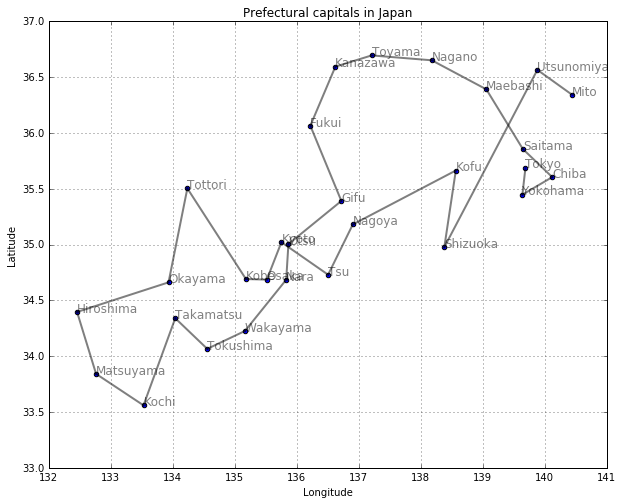

In [186]:
draw_path(col1, col3, col2, depth_first(neighbor1, 'Tokyo'))

__課題4：__ 京都からスタートしたらどのような経路になるか確認してみましょう。

## 幅優先探索
幅優先探索（はばゆうせんたんさく、英: breadth first search）はグラフ理論(Graph theory)において木構造(tree structure)やグラフ(graph)の探索に用いられるアルゴリズムです。アルゴリズムは根ノードで始まり隣接した全てのノードを探索します。それからこれらの最も近いノードのそれぞれに対して同様のことを繰り返して探索対象ノードをみつけます。「横型探索」とも言われます。深さ優先探索と、幅優先探索の探索順序の違いは下図の通り。
<img src="http://www.unfindable.net/images/search/dfs-bfs.png">

In [180]:
def width_first(neighbor, start):
    visited = []
    queue = []
    queue.append(start)
    result = []
    while len(queue) > 0:
        next_city = queue.pop(0)
        if next_city in visited:
            continue
        result.append (next_city)
        visited.append(next_city)
        for nei in neighbor[next_city]:
            queue.append(nei)
    return [result]

In [181]:
print (width_first(neighbor1, 'Tokyo'))

[['Tokyo', 'Mito', 'Utsunomiya', 'Maebashi', 'Saitama', 'Chiba', 'Yokohama', 'Kofu', 'Nagano', 'Shizuoka', 'Toyama', 'Kanazawa', 'Fukui', 'Gifu', 'Nagoya', 'Tsu', 'Otsu', 'Kyoto', 'Osaka', 'Nara', 'Kobe', 'Wakayama', 'Tokushima', 'Okayama', 'Takamatsu', 'Tottori', 'Kochi', 'Matsuyama', 'Hiroshima']]


得られたパス（経路）を図にしてみましょう。幅優先探索では、始点からの距離の短い（ステップ数の小さい）場所から行くような探索になることがわかります。

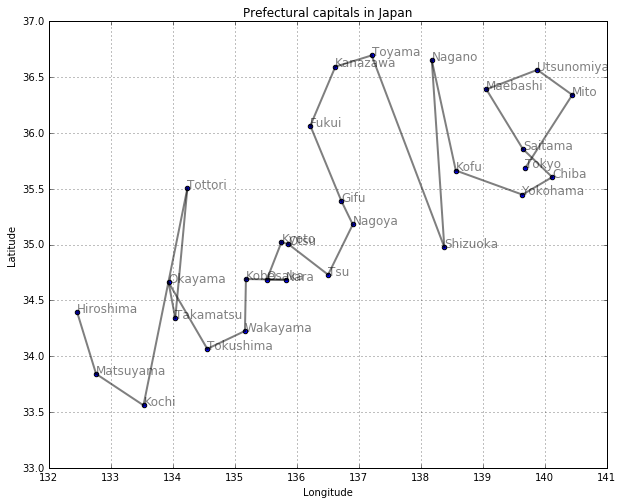

In [198]:
draw_path(col1, col3, col2, width_first(neighbor1, 'Tokyo'))

__課題5：__ 京都からスタートしたらどのような経路になるか確認してみましょう。

## 連結成分 (connected components, connected subgraphs)
連結成分は、深さ優先探索、幅優先探索のどちらを使っても求められます。

In [99]:
def connected_components(neighbor):
    visited = []
    result = []
    for city in neighbor.keys():
        if city in visited:
            continue
        component = depth_first(neighbor, city)
        # component = width_first(neighbor, city) でも良い
        result.append(component)
        for city2 in component:
            visited.append(city2)
    return result

In [100]:
for component in connected_components(neighbor1):
    print (component)

['Utsunomiya', 'Tokyo', 'Yokohama', 'Chiba', 'Saitama', 'Maebashi', 'Nagano', 'Toyama', 'Kanazawa', 'Fukui', 'Gifu', 'Otsu', 'Nara', 'Wakayama', 'Tokushima', 'Takamatsu', 'Kochi', 'Matsuyama', 'Hiroshima', 'Okayama', 'Tottori', 'Kobe', 'Osaka', 'Kyoto', 'Tsu', 'Nagoya', 'Kofu', 'Shizuoka', 'Mito']
['Nagasaki', 'Kumamoto', 'Oita', 'Yamaguchi', 'Saga', 'Fukuoka']
['Miyazaki', 'Kagoshima']
['Sendai', 'Fukushima', 'Yamagata']


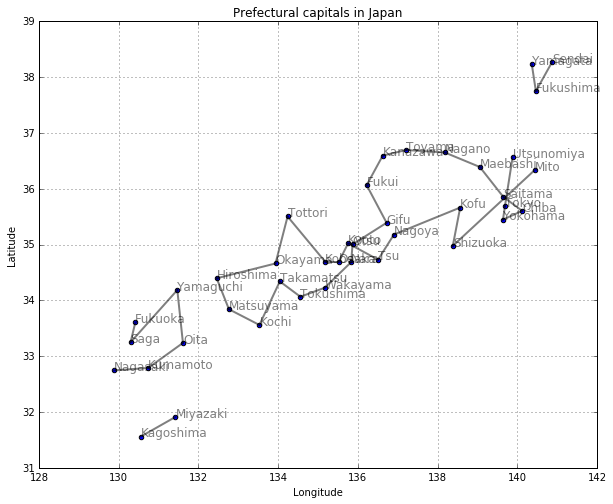

In [101]:
draw_path(col1, col3, col2, connected_components(neighbor1))

### 徒歩で日本を旅する
今までは緯度と経度を利用して都市間の距離を計算し、都市間の関係を考えてきました。ここからは、都市間を歩いて回ります。都市間を歩くと何時間かかるのか、Google Mapで予想した結果があるので、これを用います（海を挟むため歩けない場合はフェリーに乗ります）。まずはデータのダウンロードから。

In [171]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/walk.txt'

In [172]:
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'walk.txt') # Python 2 の場合
# urllib.request.urlretrieve(url, 'walk.txt') # Python 3 の場合

('walk.txt', <httplib.HTTPMessage instance at 0x11e7338c0>)

In [174]:
# 先頭数行の確認
!head walk.txt

Town1   Town2   Hour  Ferry
Sapporo Aomori 55  True
Akita      Aomori 36
Akita      Sendai  45
Akita      Niigata  52
Yamagata  Aomori 75
Morioka   Aomori    37
Morioka Akita 24
Yamagata Akita 41
Yamagata Morioka 46


In [105]:
# ダウンロードしたデータから、列ごとに数字を読み込んでリストに格納する。
col4 = [] # ０列目の数字を格納する予定のリスト
col5 = [] # １列目の数字を格納する予定のリスト
col6 = [] # ２列目の数字を格納する予定のリスト
for i, line in enumerate(open('walk.txt')): # ファイルを開いて一行一行読み込む
    if i == 0: # ０番目の行の場合
        continue # 次の行に行く
    c = line.split() # 行を空白文字で分割したものをcというリストに入れる
    col4.append(c[0]) # ０列目の単語をcol4に入れる
    col5.append(c[1]) # １列目の単語をcol5に入れる
    col6.append(float(c[2])) # ２列目の単語を実数に変換してcol6に入れる

まずは、徒歩ネットワークを図示してみます。

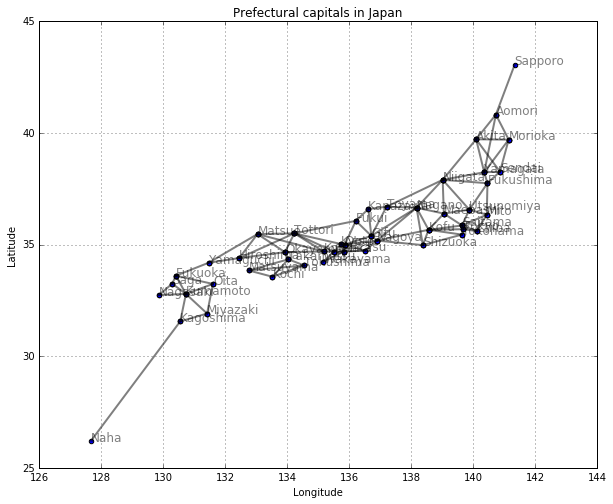

In [106]:
draw_path(col1, col3, col2, [[city1, city2] for city1, city2 in zip(col4, col5)])

### 同じ都市は二度と訪問しない経路
上の地図をもとに、「同じ都市は二度と訪問しない」「ある都市に着いたら、その次は、未訪問の都市の中で最も近い都市に向かって歩く」という条件で彷徨い歩いてみましょう。東京から出発して彷徨い歩いたら、どこにたどり着けるでしょうか？

In [107]:
walk_neighbor = {}
for city1, city2, walk in zip(col4, col5, col6):
    if city1 not in walk_neighbor.keys():
        walk_neighbor.update({city1:[]})
    walk_neighbor[city1].append([walk, city2])
    if city2 not in walk_neighbor.keys():
        walk_neighbor.update({city2:[]})
    walk_neighbor[city2].append([walk, city1])

In [176]:
# 東京に隣接している都市を、近い順に並べる
print (sorted(walk_neighbor["Tokyo"]))

[[5.0, 'Saitama'], [7.0, 'Yokohama'], [8.0, 'Chiba'], [28.0, 'Kofu']]


彷徨い歩くときは、深さ優先探索的な考え方を使います。まずは関数を作成しましょう。

In [177]:
def nearest_wander(neighbor, start):
    visited = []
    curr = start
    result = []
    while True:
        result.append(curr)
        visited.append(curr)
        count = 0
        for dist, next_city in sorted(neighbor[curr]):
            if next_city in visited:
                count += 1
            else:
                curr = next_city
                break
        if count == len(neighbor[curr]):
            break
    return [result]

東京から出発して彷徨い歩いてみます。

In [178]:
print (nearest_wander(walk_neighbor, "Tokyo"))

[['Tokyo', 'Saitama', 'Chiba', 'Mito', 'Utsunomiya', 'Maebashi', 'Nagano', 'Kofu', 'Shizuoka', 'Yokohama']]


経路を図示してみます。

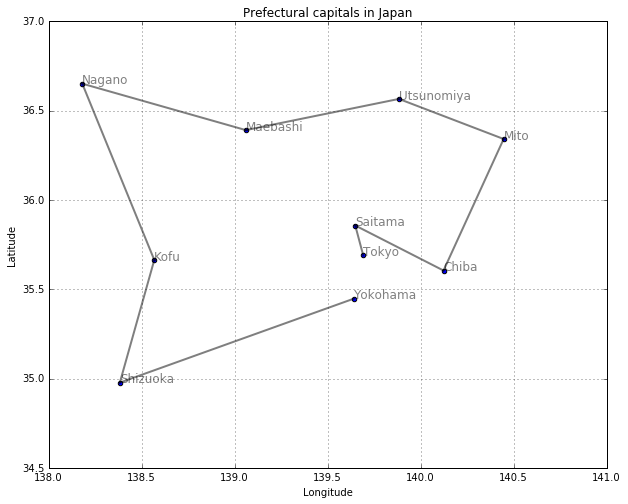

In [200]:
draw_path(col1, col3, col2, nearest_wander(walk_neighbor, "Tokyo"))

__課題6：__ 横浜からスタートすると、どこまで行けるか試してみてください。

続いて、「同じ都市は二度と訪問しない」という条件で、できるだけ長い経路を探してみましょう。これを無制限に実行すると時間がかかるので、「最大ステップ数（訪問する最大の都市の数）」を決めてから実行します。まずは関数の作成から。

In [161]:
import copy
def longest_wander(neighbor, start, max_cities):
    queue = []
    queue.append([start])
    result = []
    while True:
        curr_path = queue.pop()
        #print curr_path
        last = curr_path[-1]
        count = 0
        for nei in reversed(sorted(neighbor[last])):
            if nei[1] not in curr_path:
                new_path = copy.copy(curr_path)
                new_path.append(nei[1])
                queue.append(new_path)
                count += 1
        if count == 0:
            if len(result) == 0:
                result = [curr_path]
            elif len(result[0]) < curr_path:
                result = [curr_path]
        if len(curr_path) == len(neighbor.keys()):
            break
        if len(curr_path) == max_cities:
            break
    return result

東京からスタートして、最大ステップ数３０でどこまで行けるか見てみましょう。

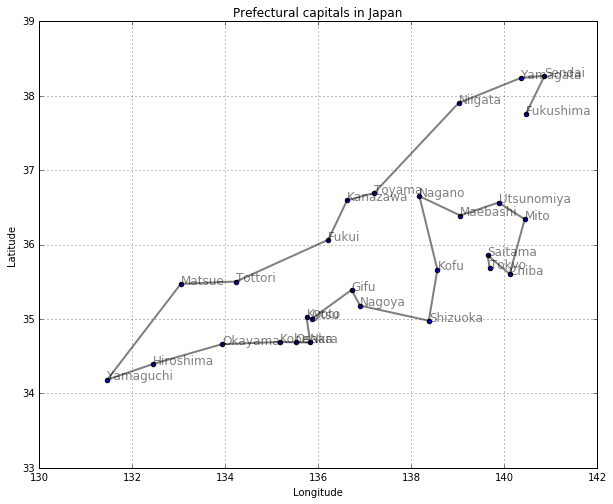

In [169]:
draw_path(col1, col3, col2, longest_wander(walk_neighbor, "Tokyo", 30))

__課題7:__ 同様に、東京からスタートして最大ステップ数35だとどこに行けるか確認してください。

### 閉路 (cycle)
指定した都市スタートで、「同じ都市は二度と訪問しない」という条件で、指定したステップ数で一周する回路（閉路）を探します。

In [203]:
import copy
def cycle(neighbor, start, ring_size):
    stack = []
    stack.append([start])
    result = []
    count = 0
    while len(stack) > 0:
        curr_path = stack.pop()
        if len(curr_path) > ring_size:
            continue
        #print curr_path
        count += 1
        last = curr_path[-1]
        for nei in neighbor[last]:
            if nei[1] in curr_path:
                if (len(curr_path) == ring_size) and (curr_path[0] == nei[1]):
                    new_path = copy.copy(curr_path)
                    new_path.append(nei[1])
                    result.append(new_path)
                continue
            new_path = copy.copy(curr_path)
            new_path.append(nei[1])
            stack.append(new_path)
        continue
        if count > 50:
            break
    return result

東京スタート、ステップ数３の場合

In [204]:
print cycle(walk_neighbor, "Tokyo", 3)

[['Tokyo', 'Kofu', 'Yokohama', 'Tokyo'], ['Tokyo', 'Kofu', 'Saitama', 'Tokyo'], ['Tokyo', 'Yokohama', 'Kofu', 'Tokyo'], ['Tokyo', 'Chiba', 'Saitama', 'Tokyo'], ['Tokyo', 'Saitama', 'Kofu', 'Tokyo'], ['Tokyo', 'Saitama', 'Chiba', 'Tokyo']]


これらの閉路を全て図示すると

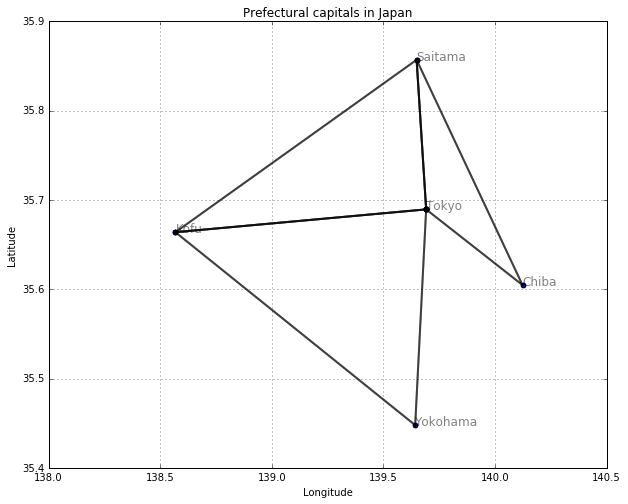

In [205]:
draw_path(col1, col3, col2, cycle(walk_neighbor, "Tokyo", 3))

__課題8：__ 東京スタートで、ステップ数４の閉路を全て描いてください。

### 最小木 (minimum spanning tree)

* 木 (tree) とは、閉路を含まないグラフのこと。
* 全域木(Spanning tree)　とは、連結グラフの全ての頂点とそのグラフを構成する辺の一部分のみで構成される木のこと。
* 最小木 (minimum spanning tree) とは、全域木のうち、辺の重み（距離など）の和が最小のもの。

最小木を得るときには、始点を決める必要があります。まずは関数の作成から。

In [115]:
def minimum_tree(neighbor, start):
    visited = []
    queue = []
    result = []
    queue.append([start, start, 0])
    while len(queue) > 0:
        queue = sorted(queue, key=lambda e: e[2])
        curr_i, curr_j, accum_dist = queue.pop(0)
        if (curr_i in visited) and (curr_j in visited):
            continue
        visited.append(curr_i)
        visited.append(curr_j)
        if curr_i != curr_j:
            result.append([curr_i, curr_j])
        for curr in [curr_i, curr_j]:
            for nei in neighbor[curr]:
                if nei[1] in visited:
                    continue
                queue.append([curr, nei[1], nei[0] + accum_dist])
    return result

日本各地から江戸（東京）に徒歩で参覲交代する大名の気持ちになってみましょう。東京を始点とした最小木を求めてみます。

In [116]:
print (minimum_tree(walk_neighbor, "Tokyo"))

[['Tokyo', 'Saitama'], ['Tokyo', 'Yokohama'], ['Tokyo', 'Chiba'], ['Saitama', 'Maebashi'], ['Saitama', 'Utsunomiya'], ['Saitama', 'Mito'], ['Tokyo', 'Kofu'], ['Yokohama', 'Shizuoka'], ['Maebashi', 'Nagano'], ['Utsunomiya', 'Fukushima'], ['Maebashi', 'Niigata'], ['Fukushima', 'Sendai'], ['Fukushima', 'Yamagata'], ['Shizuoka', 'Nagoya'], ['Nagoya', 'Gifu'], ['Nagano', 'Toyama'], ['Nagoya', 'Tsu'], ['Toyama', 'Kanazawa'], ['Nagoya', 'Otsu'], ['Otsu', 'Kyoto'], ['Tsu', 'Nara'], ['Sendai', 'Morioka'], ['Gifu', 'Fukui'], ['Kyoto', 'Osaka'], ['Yamagata', 'Akita'], ['Osaka', 'Kobe'], ['Osaka', 'Wakayama'], ['Kyoto', 'Tottori'], ['Kobe', 'Okayama'], ['Morioka', 'Aomori'], ['Okayama', 'Takamatsu'], ['Takamatsu', 'Tokushima'], ['Tottori', 'Matsue'], ['Okayama', 'Hiroshima'], ['Takamatsu', 'Kochi'], ['Takamatsu', 'Matsuyama'], ['Aomori', 'Sapporo'], ['Hiroshima', 'Yamaguchi'], ['Yamaguchi', 'Fukuoka'], ['Fukuoka', 'Saga'], ['Fukuoka', 'Kumamoto'], ['Fukuoka', 'Oita'], ['Saga', 'Nagasaki'], ['Kumam

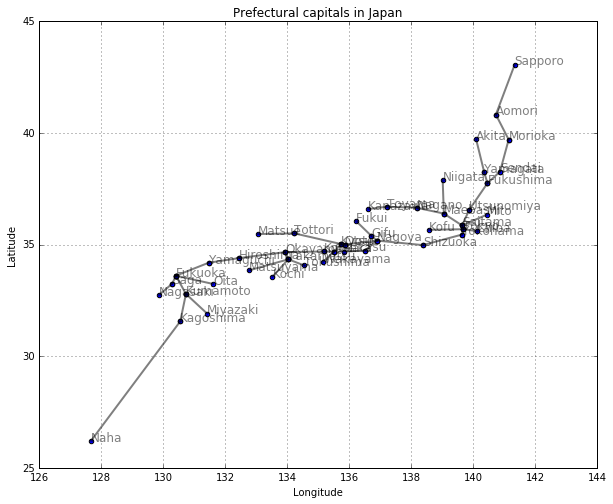

In [117]:
draw_path(col1, col3, col2, minimum_tree(walk_neighbor, "Tokyo"))

__課題9:__ 京都を始点とした最短経路木を描いてください。

### 最短経路 (shortest path)
* 最短経路 (shortest path) とは、ある始点から終点までを結ぶ経路 (path) のうち、辺の重み（距離など）の和が最小のもの。

最短経路 (shortest path) は、最小木 (minimum spanning tree) から求めることができます。まずは関数の作成から。

In [118]:
import copy
def shortest_path(original_neighbor, start, goal):
    neighbor = {}
    for edge in minimum_tree(original_neighbor, start):
        if edge[0] not in neighbor.keys():
            neighbor.update({edge[0]:[]})
        neighbor[edge[0]].append(edge[1])
        if edge[1] not in neighbor.keys():
            neighbor.update({edge[1]:[]})
        neighbor[edge[1]].append(edge[0])
    queue = []
    queue.append([start])
    result = []
    while len(queue) > 0:
        curr_path = queue.pop()
        if curr_path[-1] == goal:
            result.append(curr_path)
            break
        for nei in neighbor[curr_path[-1]]:
            if nei in curr_path:
                continue
            new_path = copy.copy(curr_path)
            new_path.append(nei)
            queue.append(new_path)
    return result

平戸（長崎）に来港して江戸（東京）の将軍に謁見するオランダ商人の気持ちになってみましょう。長崎から東京までの最短経路を求めてください。

In [119]:
print shortest_path(walk_neighbor, "Tokyo", "Nagasaki")

[['Tokyo', 'Yokohama', 'Shizuoka', 'Nagoya', 'Otsu', 'Kyoto', 'Osaka', 'Kobe', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Fukuoka', 'Saga', 'Nagasaki']]


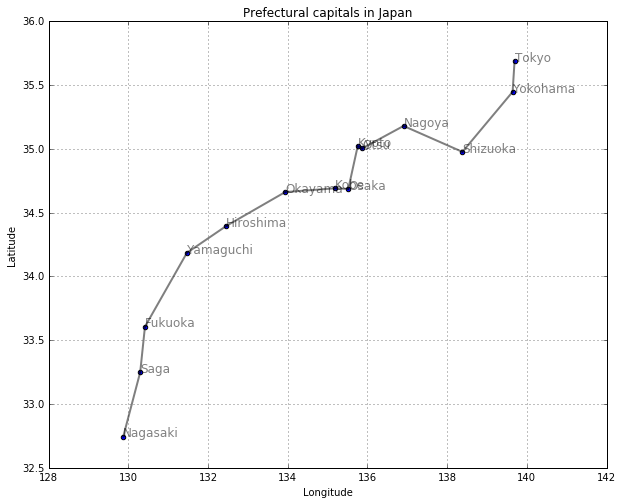

In [206]:
draw_path(col1, col3, col2, shortest_path(walk_neighbor, "Nagasaki", "Tokyo"))

__課題10:__ 札幌から那覇に行く最短経路を求めてください。

### 巡回セールスマン問題 (traveling salesman problem, TSP) 、中国人郵便配達問題 (Chinese postman problem) 

* __巡回セールスマン問題__（traveling salesman problem、TSP）は、都市の集合と各2都市間の移動コスト（たとえば距離）が与えられたとき、全ての都市をちょうど一度ずつ巡り出発地に戻る閉路の総移動コストが最小のものを求める（セールスマンが所定の複数の都市を1回だけ巡回する場合の最短経路を求める）組合せ最適化問題である。
* __中国人郵便配達問題__（Chinese postman problem）とは、都市の集合と各2都市間の移動コスト（たとえば距離）が与えられたとき、都市間の辺の全てをちょうど一度ずつ通り出発地に戻る閉路の総移動コストが最小のものを求める最適化問題である。

## オイラーグラフ(Eulerian graph)

* __一筆書き__ (One-stroke sketch)　とは、始点と終点が違う場所であっても構わない。
* __オイラーグラフ__(Eulerian graph)とは、中国人郵便配達問題の答えが存在するようなグラフ、つまり、始点からスタートして全ての辺を一度ずつだけ通って終点に戻ってくるような閉路が存在するようなグラフのことを指す。オイラーグラフの特徴として「すべての頂点の次数（頂点に接続する辺の数）は偶数である」ことが挙げられる。
* __準オイラーグラフ__とは、一筆書きできるグラフのうち、始点と終点が同じにならないものを指す。準オイラーグラフの特徴として「次数（頂点に接続する辺の数）が奇数である頂点の数は１個か２個のどちらかである」ことが挙げられる。

## ハミルトンパス問題 (Hamilton path problem)、オイラーパス問題 (Eulerian path problem)

* __ハミルトンパス問題__とは、与えられたグラフについて、全ての頂点を一度だけ通るハミルトン経路が存在するかどうか調べる問題。ハミルトンパス問題は、1974年に「NP困難問題」に認定されました。NP困難問題というのは、簡単にいうと、コンピュータで効率的に解く方法が見つかっていないし、今後も見つけることは非常に困難であろうとされる問題です。
* __オイラーパス問題__とは、与えられたグラフについて、全ての辺を一度だけ通るオイラー経路が存在するかどうか調べる問題。オイラーパス問題には、非常に効率的なアルゴリズムが存在します。

## de Bruijn Graph を使った次世代シークエンスデータの de novo アセンブリ

[de Bruijn Graph を使った de novo アセンブリの発想がすごい件](http://d.hatena.ne.jp/hoxo_m/20100930/p1)